In [1]:
import pandas as pd

In [2]:
# data ingestion step
df = pd.read_csv("Data\gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.shape

(193573, 11)

In [4]:
# No missing values present in the data
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
# becouse id coloum will not gone affect our Modal So we should drop it 
# outherwise it will gone make more time complexcity
df = df.drop(labels=["id"],axis=True)

In [7]:
df.head()
# Now as we can see in my data id coloum is removed  

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
# let's check how many dublicate records we have in our dataset
df.duplicated().sum()

0

In [9]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [10]:
df["clarity"].str.isnumeric()

0         False
1         False
2         False
3         False
4         False
          ...  
193568    False
193569    False
193570    False
193571    False
193572    False
Name: clarity, Length: 193573, dtype: bool

In [11]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [12]:
df["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [13]:
df["clarity"].unique()
# here i can see there is no value which is integer coted with string

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [14]:
# Segregate numerical and catagorical colums
categorical_columns = df.columns[df.dtypes=="object"]
numerical_columns = df.columns[df.dtypes!='object']
# becouse there are diff. fuctionalty with respect to the categorical and numerical data 

In [15]:
print(categorical_columns)
print(numerical_columns)

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [16]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [17]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [18]:
df[numerical_columns].corr() # Irrelevant or partially relevant features can negatively impact on our model performance.

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


/n


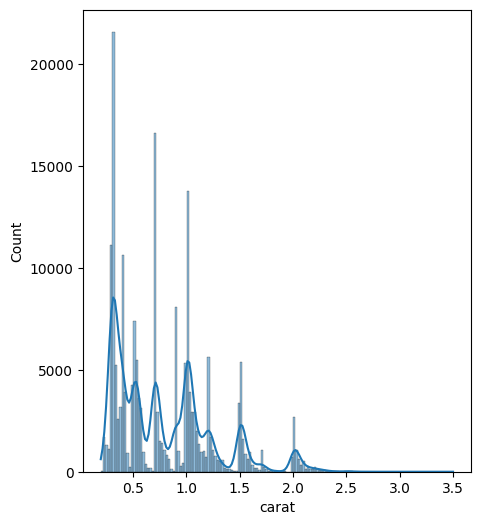

/n


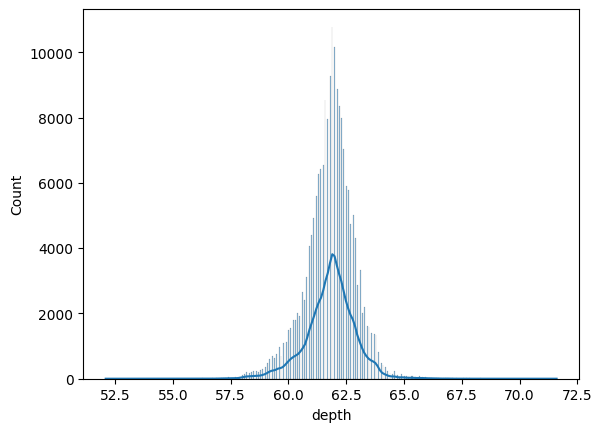

/n


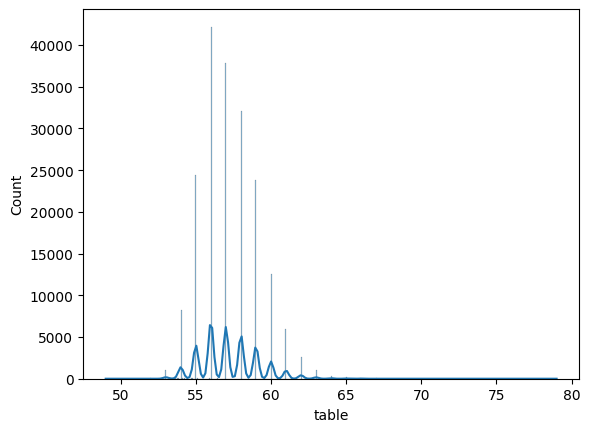

/n


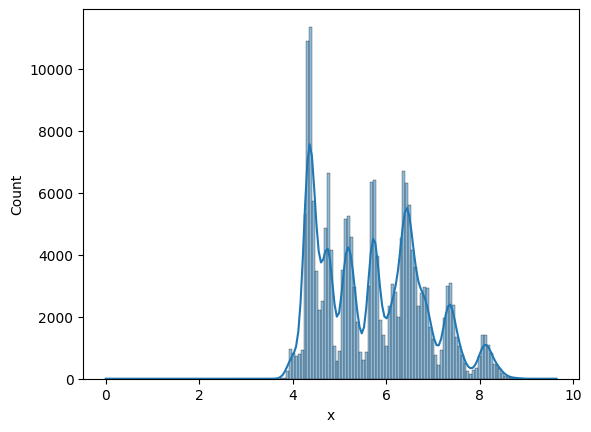

/n


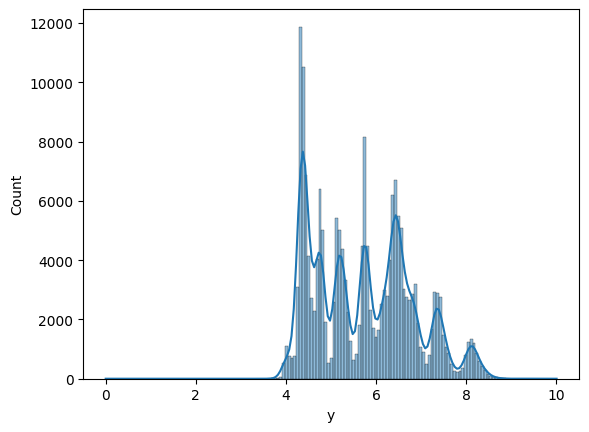

/n


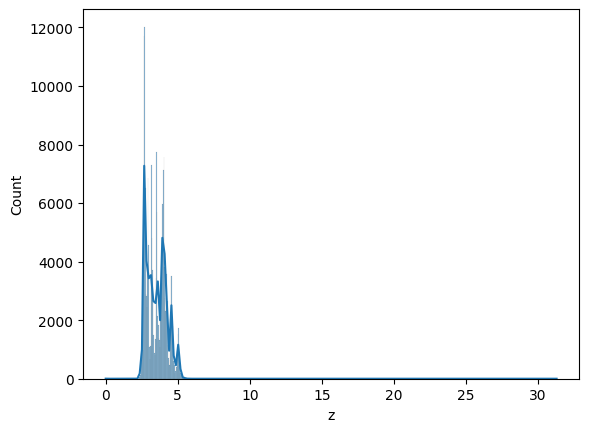

/n


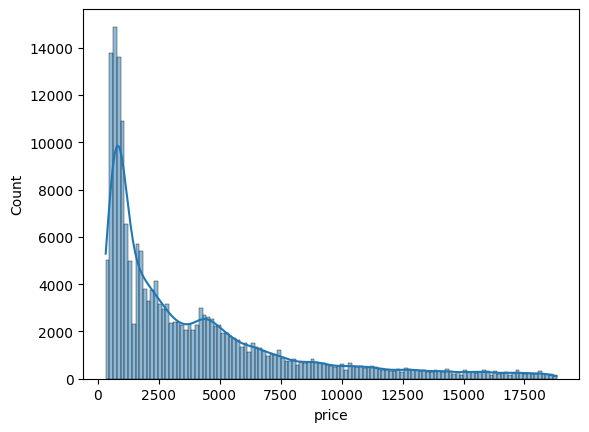

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
x = 0
for column in numerical_columns:
    sns.histplot(data= df,x=column , kde= True)
    print("/n")
    plt.show()

In [21]:
df["carat"].value_counts()

carat
0.30    10758
1.01    10103
0.31     9538
0.70     7958
0.32     7548
        ...  
2.72        1
3.40        1
3.50        1
2.71        1
1.96        1
Name: count, Length: 248, dtype: int64

In [22]:
df["cut"].value_counts() # This is what freq is

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [23]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [24]:
df["clarity"].value_counts(normalize=True)*100 # more than 27% of the clarity data having SI1 clarity

clarity
SI1     27.520367
VS2     24.810795
VS1     15.843635
SI2     15.748064
VVS2     8.142665
VVS1     5.490435
IF       2.179540
I1       0.264500
Name: proportion, dtype: float64

/n


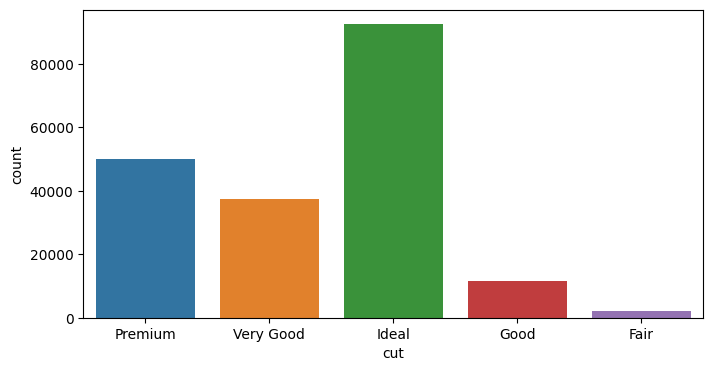

/n


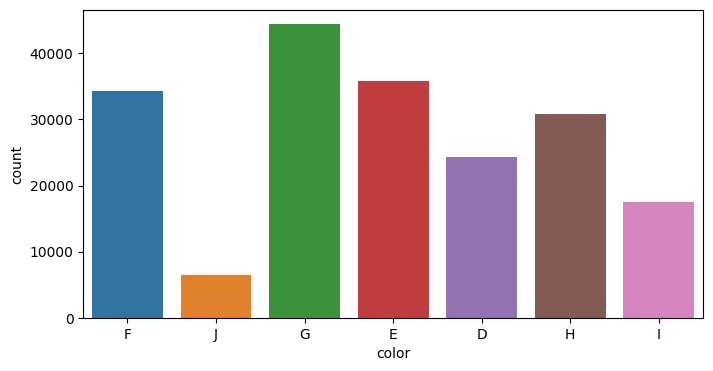

/n


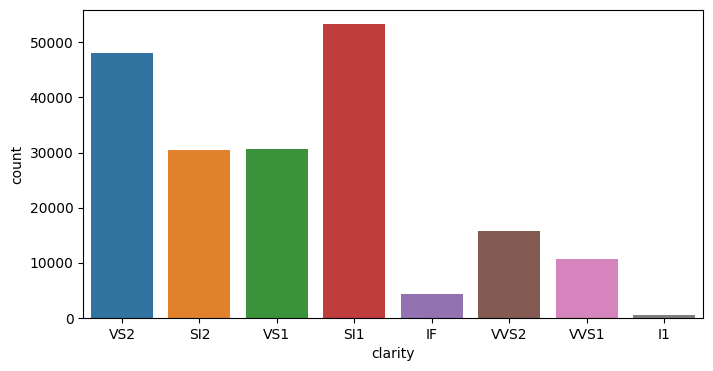

In [27]:
r = 0
for column in categorical_columns:
    plt.figure(figsize=(8,4))

    sns.countplot(data= df , x=column)
    print("/n")
    plt.show()

<Axes: xlabel='count', ylabel='color'>

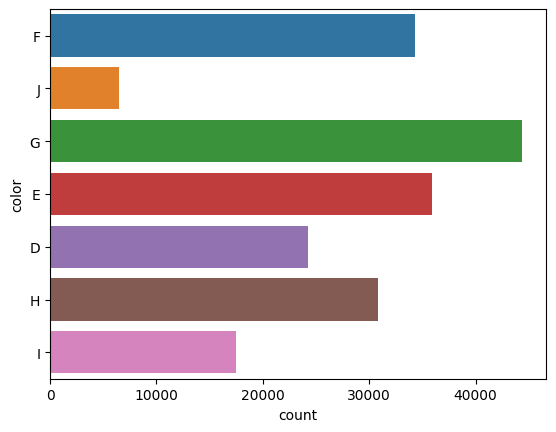

In [28]:
sns.countplot(data= df , y="color")


<Axes: xlabel='count', ylabel='cut'>

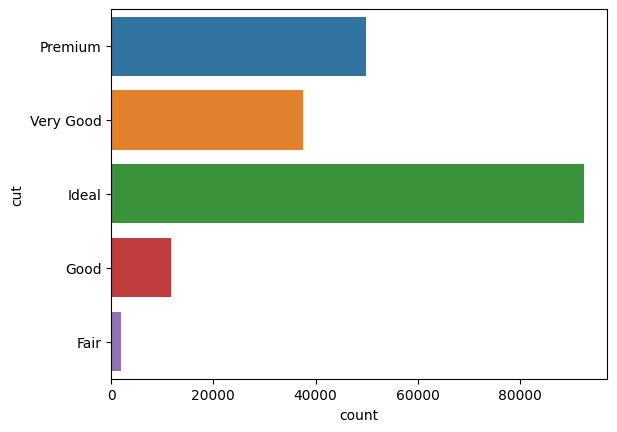

In [29]:
sns.countplot(data= df , y="cut")


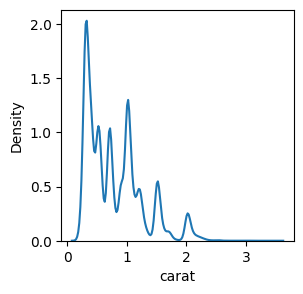

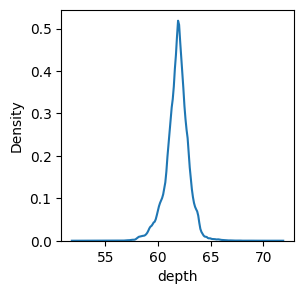

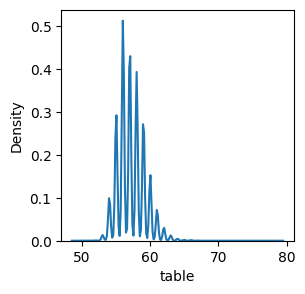

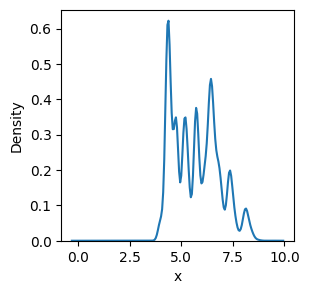

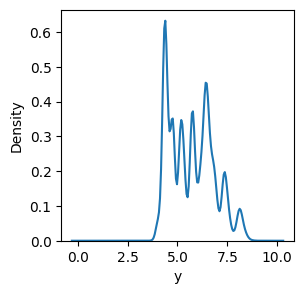

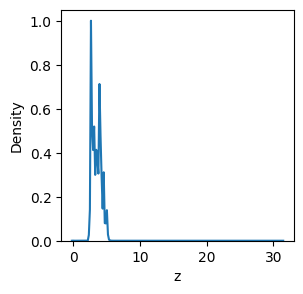

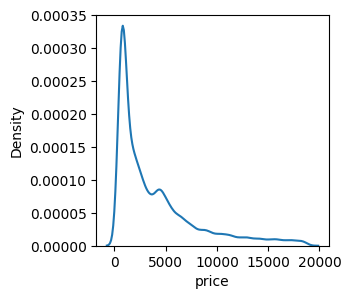

In [30]:
for column in numerical_columns:
    plt.figure(figsize=(3,3))
    sns.kdeplot(df[column])
    print("\n")
    plt.show()


In [31]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


<Axes: ylabel='count'>

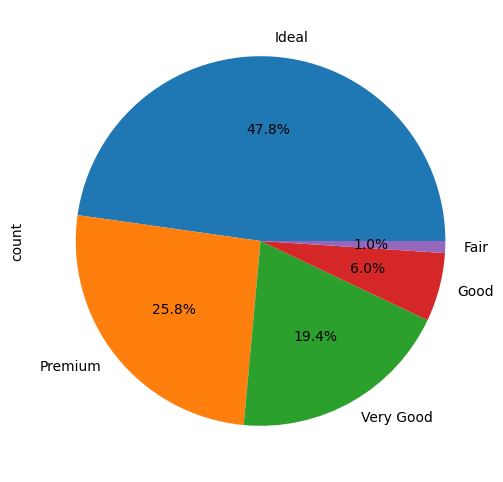

In [32]:
df["cut"].value_counts().plot.pie(y=df["cut"],figsize = (6,6),autopct =  "%1.1f%%")

In [33]:
df.groupby(df["cut"])["price"].sum().sort_values(ascending=False).reset_index()

,cut,price
0,Ideal,313991070
1,Premium,239421089
2,Very Good,156473823
3,Good,48713312
4,Fair,9722027


<Axes: >

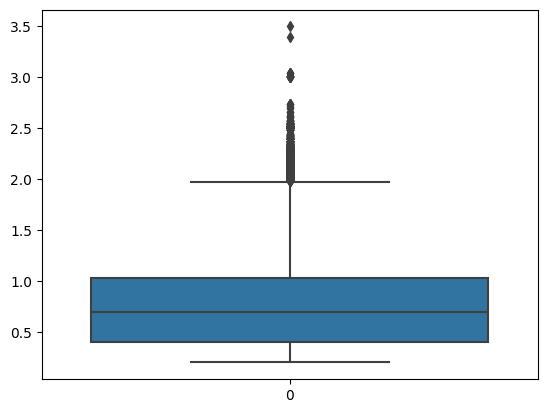

In [34]:
sns.boxplot(df["carat"])

In [35]:
import numpy as np
np.median(df["carat"])

0.7

In [36]:
np.mean(df["carat"])

0.7906878541945415

In [37]:
df_sam = df.sample(10000)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


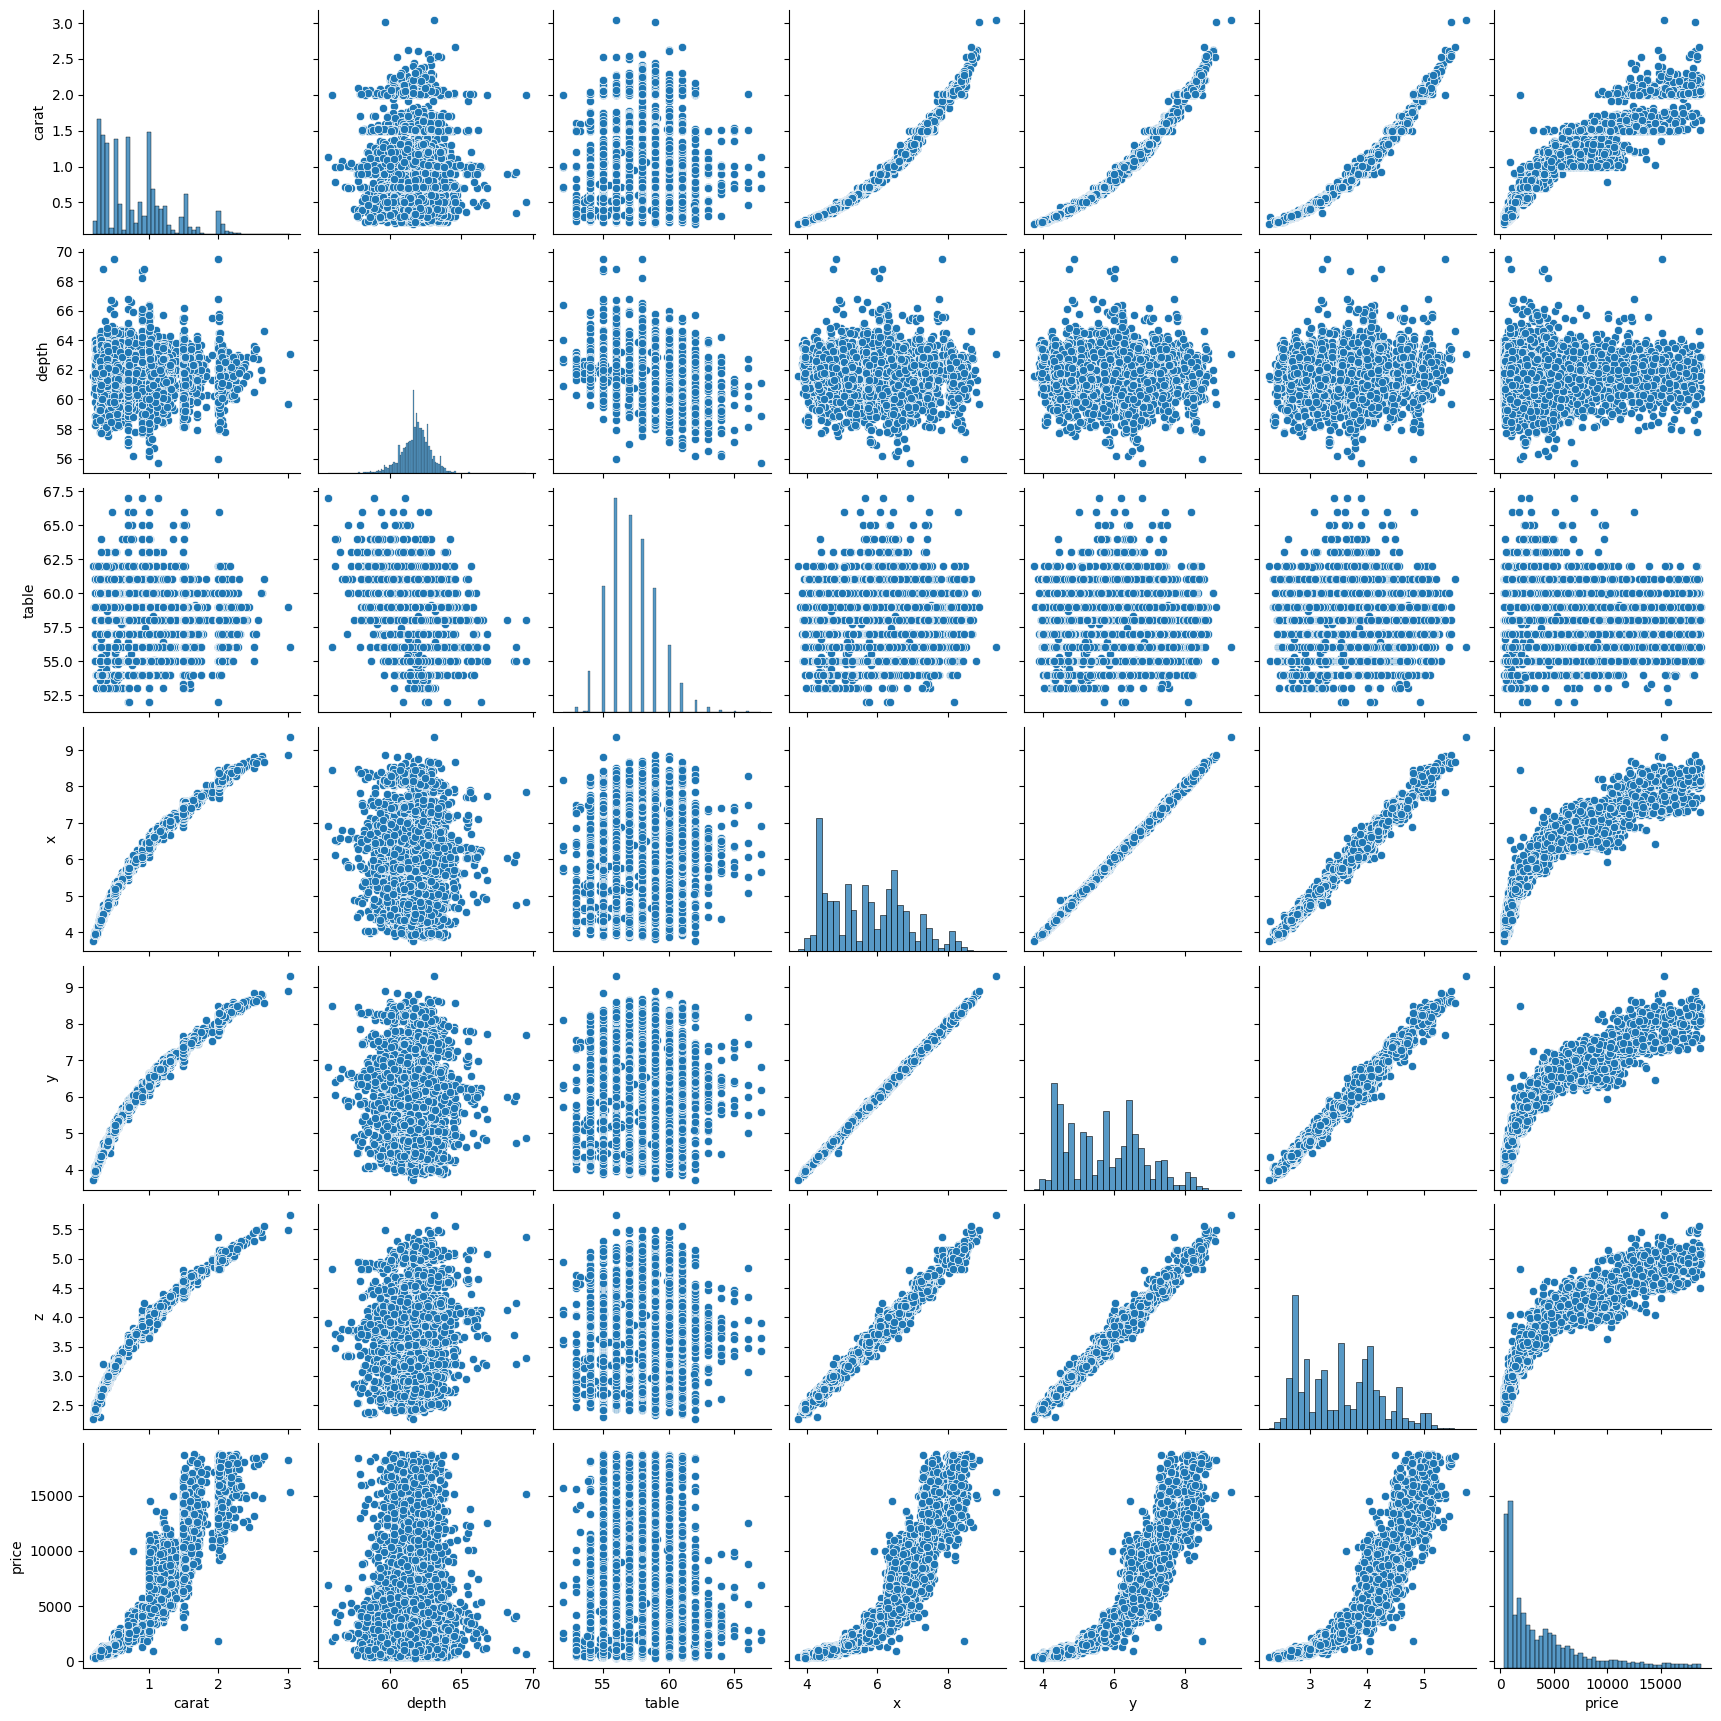

: 

In [ ]:
sns.pairplot(data=df_sam)

<Axes: >

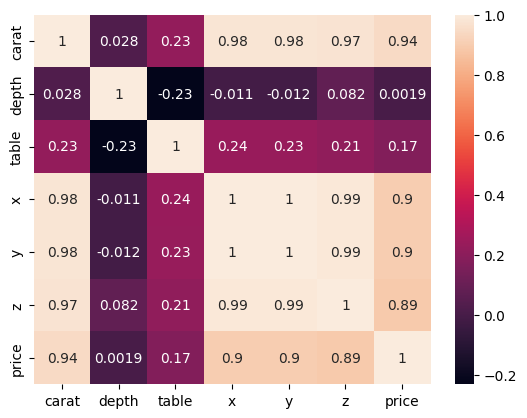

In [38]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [39]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [40]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [41]:
df["clarity"].unique()


array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [1]:
df["color"].unique()

NameError: name 'df' is not defined

In [43]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [44]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [45]:
df["cut"].map(cut_map)

0         4
1         3
2         5
3         5
4         4
         ..
193568    5
193569    4
193570    3
193571    3
193572    2
Name: cut, Length: 193573, dtype: int64

In [46]:
df["cut"] = df["cut"].map(cut_map)
df["color"] = df["color"].replace(color_map)
df["clarity"] = df["clarity"].map(clarity_map)

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
import pandas as pd
df_test=pd.read_csv(r"C:\Dimond_Price_Pred\artifacts\test.csv")

In [8]:
df_train=pd.read_csv(r"C:\Dimond_Price_Pred\artifacts\train.csv")

In [13]:
df_test["color"].value_counts().index

Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object', name='color')

In [12]:
df_train["color"].value_counts().index


Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object', name='color')